#1) Importando Bibliotecas

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

In [46]:
minimo_infectados = pd.read_csv('Minimo de infectados R0 x Vac Num (N = 10e4).csv', header=None)
column_names = ['Population', 'Basic Reprodution Number', 'Removal Rate', 'Immunity loss rate',
                'Vaccines Number (Normalized)', 'Vaccination begin time', 'Vaccination Rate',
                'Minimum number of infected']
minimo_infectados.columns = column_names

minimo_infectados.columns = column_names

# Computing the Extinction Probablity 
minimo_infectados['Extinction Probability'] = np.where(
    minimo_infectados['Minimum number of infected'] > 1e-4,
    0,
    1 - minimo_infectados['Minimum number of infected'] * 1e4
)

minimo_infectados = minimo_infectados[(minimo_infectados['Basic Reprodution Number'] <= 3)]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.18574883 0.         0.         ... 0.         0.         0.        ]
 [0.37081853 0.         0.         ... 0.         0.         0.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


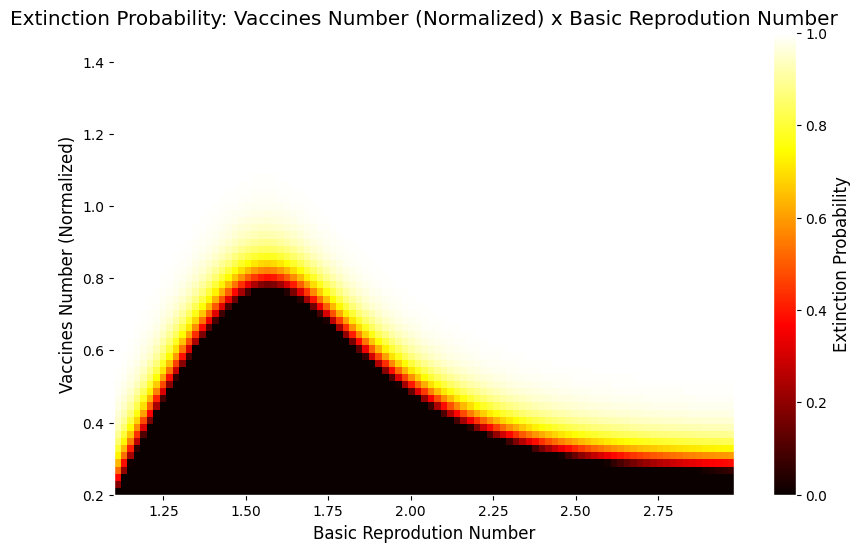

In [47]:
m = 'Basic Reprodution Number'
n = 'Vaccines Number (Normalized)'
x = minimo_infectados[m].values
y = minimo_infectados[n].values
z = minimo_infectados['Extinction Probability'].values
x_unique = np.sort(minimo_infectados[m].unique())
y_unique = np.sort(minimo_infectados[n].unique())
# Criando uma matriz de zeros com dimensões baseadas em x e y
Z = np.zeros((len(y_unique), len(x_unique)))
# Preencher a matriz Z com os valores correspondentes
for i, xi in enumerate(x_unique):
    for j, yj in enumerate(y_unique):
        mask = (minimo_infectados[m] == xi) & (minimo_infectados[n] == yj)
        if mask.any():
            Z[j, i] = minimo_infectados.loc[mask, 'Extinction Probability'].values.mean()
print(Z)
            # Criar o gráfico de mapa de calor
plt.figure(figsize=(10, 6))
plt.imshow(Z, aspect='auto', origin='lower', cmap='hot',
           extent=[x.min(), x.max(), y.min(), y.max()], vmin=0, vmax=1)

# Cor da barra de cor
cbar = plt.colorbar(label="Extinction Probability")
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='black')
cbar.set_label("Extinction Probability", color='black')

# Eixos e título em preto
plt.xlabel(m, color='black')
plt.ylabel(n, color='black')
plt.title(f"Extinction Probability: {n} x {m}", color='black')

# Ticks em preto
plt.tick_params(axis='both', colors='black')
plt.grid(False)
plt.show()